<a href="https://colab.research.google.com/github/Somu-Gen/WQI_Streamlit/blob/main/WQI_%26_Prediction_Ap_j2k21calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/AP_January_2021.csv")

In [ ]:
df

,S.no,District,Regional Office,Monitoring date,Water_Temp,DO,pH,BOD,Turbidity,TA,Chloride,COD,Magnesium,Sulphate,TDS,Fluoride
0,1,Srikakulam,Srikakulam,04.01.2021,24,8.4,8.28,1.4,1.17,148,44.0,5.2,80,9.4,252,0.46
1,2,Srikakulam,Srikakulam,04.01.2021,24,6.4,8.10,1.9,2.51,148,68.4,7.6,80,1.2,280,0.32
2,3,Srikakulam,Srikakulam,04.01.2021,22,6.5,7.47,2.0,7.85,120,24.4,8.4,48,4.4,184,0.61
3,5,Srikakulam,Srikakulam,04.01.2021,25,7.5,7.54,2.0,12.60,120,34.2,7.2,64,4.4,204,0.59
4,6,Srikakulam,Srikakulam,04.01.2021,22,8.0,8.05,1.5,1.18,148,141.8,13.6,60,48.2,520,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,86,Kadapa,Kadapa,07.01.2021,21,5.7,7.30,1.3,1.60,144,84.0,9.0,52,19.0,326,0.20
73,87,Chittoor,Tirupathi,07.01.2021,25,6.2,6.80,0.5,1.00,8,8.0,4.0,2,1.0,26,0.10
74,88,Chittoor,Tirupathi,05.01.2021,26,5.7,7.00,0.8,3.10,81,21.0,6.0,14,8.0,142,0.30
75,89,Chittoor,Tirupathi,06.01.2021,27,4.6,7.20,2.8,1.20,252,110.0,21.0,90,30.0,498,0.40


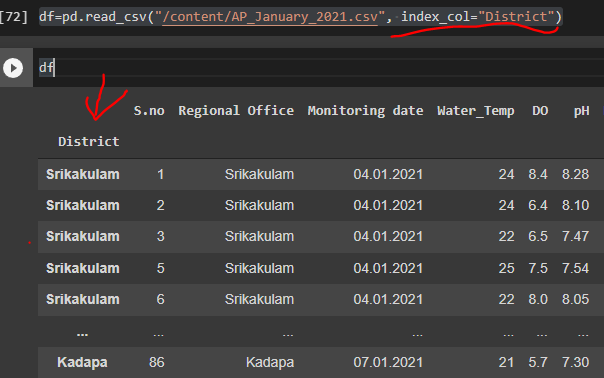

In [ ]:
df.shape

(77, 16)

In [ ]:
df.describe()

,S.no,Water_Temp,DO,pH,BOD,Turbidity,TA,Chloride,COD,Magnesium,Sulphate,TDS,Fluoride
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,46.753247,24.025974,5.885714,7.462338,2.115584,8.300260,155.402597,998.467273,11.977922,378.857143,245.842597,2447.467532,0.679351
std,26.782337,1.849424,1.412232,0.317548,0.706374,11.109992,61.511715,2599.945685,5.682675,846.240101,602.729506,5812.085554,0.338100
min,1.000000,20.000000,1.500000,6.800000,0.500000,0.800000,8.000000,8.000000,3.200000,2.000000,0.660000,26.000000,0.100000
25%,23.000000,23.000000,5.300000,7.220000,1.600000,2.000000,120.000000,44.000000,8.000000,60.000000,11.300000,236.000000,0.400000
50%,47.000000,24.000000,5.800000,7.470000,2.000000,3.000000,148.000000,97.800000,12.000000,80.000000,43.000000,426.000000,0.600000
75%,71.000000,26.000000,7.000000,7.700000,2.600000,9.730000,176.000000,181.000000,14.000000,122.000000,79.000000,708.000000,0.960000
max,90.000000,27.000000,8.500000,8.280000,4.800000,58.000000,408.000000,11800.000000,40.000000,3680.000000,2700.000000,25100.000000,1.400000


In [ ]:
df.groupby(['Regional Office']).count()['DO'].to_frame()

,DO
Regional Office,
Anantapur,3
Eluru,12
Guntur,3
Kadapa,5
Kakinada,13
Kurnool,10
Nellore,3
Ongole,1
Srikakulam,7


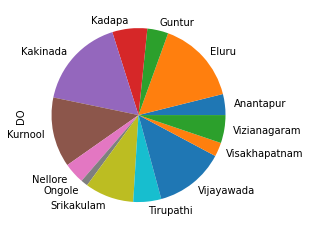

In [ ]:
df.groupby(['Regional Office']).count()['DO'].plot(kind= 'pie')

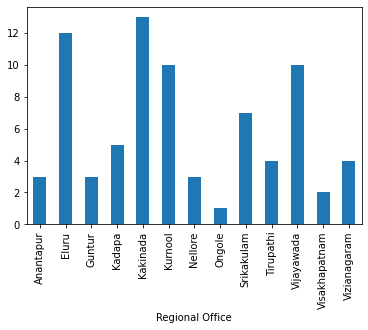

In [ ]:
df.groupby(['Regional Office']).count()['DO'].plot(kind='bar')

**I-Sub-index Calculation**

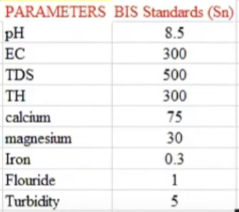

In [ ]:
def wqi(vn,vi,s):
  qn=((vn-vi)/(s-vi))*100
  return qn
  
qph=wqi(df.pH,7,8.5)
df['qpH']=qph

In [ ]:
df.pH

0     8.28
1     8.10
2     7.47
3     7.54
4     8.05
      ... 
72    7.30
73    6.80
74    7.00
75    7.20
76    7.10
Name: pH, Length: 77, dtype: float64

In [ ]:
#df.drop(['Monitoring_date','Water_Temp_(oC)'])

Sn = [ph_8.5, DO_5,Turbidity_5,TA_200,TDS_500,Mg_30,F_1]

In [ ]:
def wqi(vn,vi,s):
  qn=((vn-vi)/(s-vi))*100
  return qn

qph=wqi(df.pH,7,8.5)
df['qpH']=qph

q_DO=wqi(df.DO,14.6,5)
df['q_DO']=q_DO



q_Turbidity=wqi(df.Turbidity ,0,5)
df['q_Turbidity']=q_Turbidity

q_TA=wqi(df.TA,0,200)
df['q_TA']=q_TA

q_TDS=wqi(df.TDS,0,500)
df['q_TDS']=q_TDS

q_Mg=wqi(df.Magnesium,0,30)
df['q_Mg']=q_Mg

q_F=wqi(df.Fluoride,0,1)
df['q_F']=q_F


In [ ]:
df

,S.no,District,Regional Office,Monitoring date,Water_Temp,DO,pH,BOD,Turbidity,TA,...,Sulphate,TDS,Fluoride,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F
0,1,Srikakulam,Srikakulam,04.01.2021,24,8.4,8.28,1.4,1.17,148,...,9.4,252,0.46,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0
1,2,Srikakulam,Srikakulam,04.01.2021,24,6.4,8.10,1.9,2.51,148,...,1.2,280,0.32,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0
2,3,Srikakulam,Srikakulam,04.01.2021,22,6.5,7.47,2.0,7.85,120,...,4.4,184,0.61,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0
3,5,Srikakulam,Srikakulam,04.01.2021,25,7.5,7.54,2.0,12.60,120,...,4.4,204,0.59,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0
4,6,Srikakulam,Srikakulam,04.01.2021,22,8.0,8.05,1.5,1.18,148,...,48.2,520,1.01,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,86,Kadapa,Kadapa,07.01.2021,21,5.7,7.30,1.3,1.60,144,...,19.0,326,0.20,20.000000,92.708333,32.0,72.0,65.2,173.333333,20.0
73,87,Chittoor,Tirupathi,07.01.2021,25,6.2,6.80,0.5,1.00,8,...,1.0,26,0.10,-13.333333,87.500000,20.0,4.0,5.2,6.666667,10.0
74,88,Chittoor,Tirupathi,05.01.2021,26,5.7,7.00,0.8,3.10,81,...,8.0,142,0.30,0.000000,92.708333,62.0,40.5,28.4,46.666667,30.0
75,89,Chittoor,Tirupathi,06.01.2021,27,4.6,7.20,2.8,1.20,252,...,30.0,498,0.40,13.333333,104.166667,24.0,126.0,99.6,300.000000,40.0


In [ ]:
z = df.iloc[:,16:]
z


,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F
0,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0
1,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0
2,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0
3,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0
4,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0
...,...,...,...,...,...,...,...
72,20.000000,92.708333,32.0,72.0,65.2,173.333333,20.0
73,-13.333333,87.500000,20.0,4.0,5.2,6.666667,10.0
74,0.000000,92.708333,62.0,40.5,28.4,46.666667,30.0
75,13.333333,104.166667,24.0,126.0,99.6,300.000000,40.0


In [ ]:
c = z.sum(axis=1)
c

0     610.383333
1     637.616667
2     590.508333
3     735.091667
4     641.350000
         ...    
72    475.241667
73    120.033333
74    300.275000
75    707.100000
76    725.458333
Length: 77, dtype: float64

In [ ]:
z['final index']= c
z.to_csv("WQI_Ap_jan_2021.csv")

**2- Weightage Factor(w)**

Simple way to calculate is
**w = harmonic mean / total no.of samples**

wn= k/sn

k =1/Σ(1/sn)


In [ ]:
#Example
d = [1,2]

hm=statistics.harmonic_mean(d)/2
hm

0.6666666666666666

**List to data frames Examples:**

---



https://www.statology.org/list-to-dataframe-python/


**Sn = [ph_8.5, DO_5,Turbidity_5,TA_200,TDS_500,Mg_30,F_1]**


In [ ]:
Sn = [8.5,5,5,200,500,30,1]

k=statistics.harmonic_mean(Sn)/len(Sn)
k

Wn=[]
for i in range(0,len(Sn)):
  w =k/Sn[i]
  Wn.append(w)
Wn  

Wn_c= pd.DataFrame(Wn,columns=["Wn"])
Wn_c

,Wn
0,0.075513
1,0.128371
2,0.128371
3,0.003209
4,0.001284
5,0.021395
6,0.641857


In [ ]:
k
L=len(Sn)
L

7

In [ ]:
Wn_c.shape

(7, 1)

In [ ]:
df

,S.no,District,Regional Office,Monitoring date,Water_Temp,DO,pH,BOD,Turbidity,TA,...,Sulphate,TDS,Fluoride,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F
0,1,Srikakulam,Srikakulam,04.01.2021,24,8.4,8.28,1.4,1.17,148,...,9.4,252,0.46,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0
1,2,Srikakulam,Srikakulam,04.01.2021,24,6.4,8.10,1.9,2.51,148,...,1.2,280,0.32,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0
2,3,Srikakulam,Srikakulam,04.01.2021,22,6.5,7.47,2.0,7.85,120,...,4.4,184,0.61,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0
3,5,Srikakulam,Srikakulam,04.01.2021,25,7.5,7.54,2.0,12.60,120,...,4.4,204,0.59,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0
4,6,Srikakulam,Srikakulam,04.01.2021,22,8.0,8.05,1.5,1.18,148,...,48.2,520,1.01,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,86,Kadapa,Kadapa,07.01.2021,21,5.7,7.30,1.3,1.60,144,...,19.0,326,0.20,20.000000,92.708333,32.0,72.0,65.2,173.333333,20.0
73,87,Chittoor,Tirupathi,07.01.2021,25,6.2,6.80,0.5,1.00,8,...,1.0,26,0.10,-13.333333,87.500000,20.0,4.0,5.2,6.666667,10.0
74,88,Chittoor,Tirupathi,05.01.2021,26,5.7,7.00,0.8,3.10,81,...,8.0,142,0.30,0.000000,92.708333,62.0,40.5,28.4,46.666667,30.0
75,89,Chittoor,Tirupathi,06.01.2021,27,4.6,7.20,2.8,1.20,252,...,30.0,498,0.40,13.333333,104.166667,24.0,126.0,99.6,300.000000,40.0


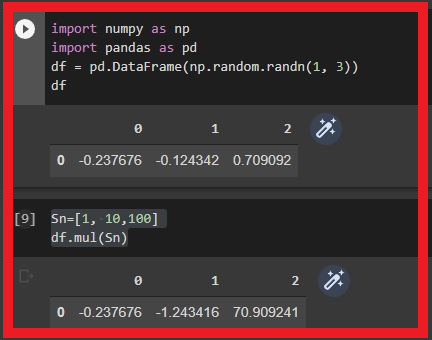

In [ ]:
z = df.iloc[:,16:]
z

,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F
0,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0
1,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0
2,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0
3,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0
4,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0
...,...,...,...,...,...,...,...
72,20.000000,92.708333,32.0,72.0,65.2,173.333333,20.0
73,-13.333333,87.500000,20.0,4.0,5.2,6.666667,10.0
74,0.000000,92.708333,62.0,40.5,28.4,46.666667,30.0
75,13.333333,104.166667,24.0,126.0,99.6,300.000000,40.0


In [ ]:
y= z.mul(Wn)
y

,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F
0,6.443737,8.290648,3.003889,0.237487,0.064699,5.705392,29.525404
1,5.537586,10.965050,6.444240,0.237487,0.071888,5.705392,20.539411
2,2.366060,10.831330,20.154297,0.192557,0.047241,3.423235,39.153253
3,2.718451,9.494129,32.349573,0.192557,0.052375,4.564314,37.869539
4,5.285878,8.825528,3.029563,0.237487,0.133506,4.279044,64.827517
...,...,...,...,...,...,...,...
72,1.510251,11.901091,4.107882,0.231068,0.083698,3.708505,12.837132
73,-1.006834,11.232491,2.567426,0.012837,0.006675,0.142635,6.418566
74,0.000000,11.901091,7.959022,0.129976,0.036457,0.998444,19.255698
75,1.006834,13.372013,3.080912,0.404370,0.127858,6.418566,25.674264


In [ ]:
s = y.sum(axis =1)
s

0     53.271255
1     49.501055
2     76.167973
3     87.240939
4     86.618523
        ...    
72    34.379628
73    19.373796
74    40.280688
75    50.084816
76    71.960350
Length: 77, dtype: float64

In [ ]:
y['WQI']= s
y.to_csv("F_WQI_Ap_jan_2021.csv")

In [ ]:
y

,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F
0,6.443737,8.290648,3.003889,0.237487,0.064699,5.705392,29.525404
1,5.537586,10.965050,6.444240,0.237487,0.071888,5.705392,20.539411
2,2.366060,10.831330,20.154297,0.192557,0.047241,3.423235,39.153253
3,2.718451,9.494129,32.349573,0.192557,0.052375,4.564314,37.869539
4,5.285878,8.825528,3.029563,0.237487,0.133506,4.279044,64.827517
...,...,...,...,...,...,...,...
72,1.510251,11.901091,4.107882,0.231068,0.083698,3.708505,12.837132
73,-1.006834,11.232491,2.567426,0.012837,0.006675,0.142635,6.418566
74,0.000000,11.901091,7.959022,0.129976,0.036457,0.998444,19.255698
75,1.006834,13.372013,3.080912,0.404370,0.127858,6.418566,25.674264


In [ ]:
df['wqi']=s
df.to_csv("F1_WQI_Ap_jan_2021.csv")

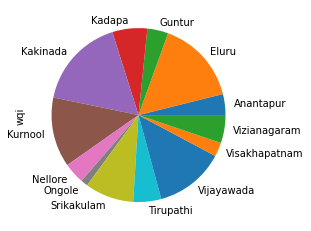

In [ ]:
df.groupby(['Regional Office']).count()['wqi'].plot(kind= 'pie')


In [ ]:
df


,S.no,District,Regional Office,Monitoring date,Water_Temp,DO,pH,BOD,Turbidity,TA,...,TDS,Fluoride,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F,wqi
0,1,Srikakulam,Srikakulam,04.01.2021,24,8.4,8.28,1.4,1.17,148,...,252,0.46,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0,53.271255
1,2,Srikakulam,Srikakulam,04.01.2021,24,6.4,8.10,1.9,2.51,148,...,280,0.32,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0,49.501055
2,3,Srikakulam,Srikakulam,04.01.2021,22,6.5,7.47,2.0,7.85,120,...,184,0.61,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0,76.167973
3,5,Srikakulam,Srikakulam,04.01.2021,25,7.5,7.54,2.0,12.60,120,...,204,0.59,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0,87.240939
4,6,Srikakulam,Srikakulam,04.01.2021,22,8.0,8.05,1.5,1.18,148,...,520,1.01,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0,86.618523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,86,Kadapa,Kadapa,07.01.2021,21,5.7,7.30,1.3,1.60,144,...,326,0.20,20.000000,92.708333,32.0,72.0,65.2,173.333333,20.0,34.379628
73,87,Chittoor,Tirupathi,07.01.2021,25,6.2,6.80,0.5,1.00,8,...,26,0.10,-13.333333,87.500000,20.0,4.0,5.2,6.666667,10.0,19.373796
74,88,Chittoor,Tirupathi,05.01.2021,26,5.7,7.00,0.8,3.10,81,...,142,0.30,0.000000,92.708333,62.0,40.5,28.4,46.666667,30.0,40.280688
75,89,Chittoor,Tirupathi,06.01.2021,27,4.6,7.20,2.8,1.20,252,...,498,0.40,13.333333,104.166667,24.0,126.0,99.6,300.000000,40.0,50.084816


**Deleting the sub-index & weighting after using for calculation**

In [ ]:
li=['qpH','q_DO','q_Turbidity','q_TA','q_TDS','q_Mg','q_F']
for i in range(0,len(li)):
  del df[li[i]]

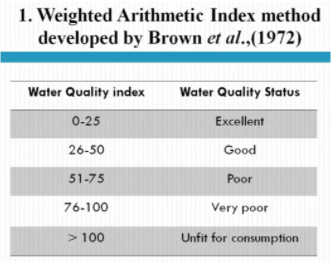

In [ ]:
df

,S.no,District,Regional Office,Monitoring date,Water_Temp,DO,pH,BOD,Turbidity,TA,Chloride,COD,Magnesium,Sulphate,TDS,Fluoride,wqi
0,1,Srikakulam,Srikakulam,04.01.2021,24,8.4,8.28,1.4,1.17,148,44.0,5.2,80,9.4,252,0.46,53.271255
1,2,Srikakulam,Srikakulam,04.01.2021,24,6.4,8.10,1.9,2.51,148,68.4,7.6,80,1.2,280,0.32,49.501055
2,3,Srikakulam,Srikakulam,04.01.2021,22,6.5,7.47,2.0,7.85,120,24.4,8.4,48,4.4,184,0.61,76.167973
3,5,Srikakulam,Srikakulam,04.01.2021,25,7.5,7.54,2.0,12.60,120,34.2,7.2,64,4.4,204,0.59,87.240939
4,6,Srikakulam,Srikakulam,04.01.2021,22,8.0,8.05,1.5,1.18,148,141.8,13.6,60,48.2,520,1.01,86.618523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,86,Kadapa,Kadapa,07.01.2021,21,5.7,7.30,1.3,1.60,144,84.0,9.0,52,19.0,326,0.20,34.379628
73,87,Chittoor,Tirupathi,07.01.2021,25,6.2,6.80,0.5,1.00,8,8.0,4.0,2,1.0,26,0.10,19.373796
74,88,Chittoor,Tirupathi,05.01.2021,26,5.7,7.00,0.8,3.10,81,21.0,6.0,14,8.0,142,0.30,40.280688
75,89,Chittoor,Tirupathi,06.01.2021,27,4.6,7.20,2.8,1.20,252,110.0,21.0,90,30.0,498,0.40,50.084816


In [ ]:
clas=df.wqi
clas

0     53.271255
1     49.501055
2     76.167973
3     87.240939
4     86.618523
        ...    
72    34.379628
73    19.373796
74    40.280688
75    50.084816
76    71.960350
Name: wqi, Length: 77, dtype: float64

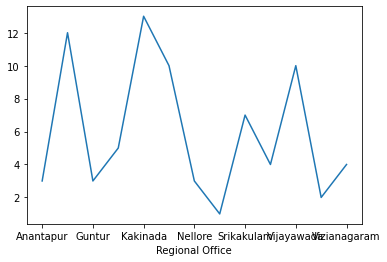

In [ ]:
df.groupby(['Regional Office']).count()['wqi'].plot(kind= 'line')

In [ ]:
 wqi_list=[]
 for x in df['wqi']:
  if x<=25:
   wqi_list.append('Excellent')
  elif 25<x<=50:
    wqi_list.append('Good')
  elif 50<x<=75:
    wqi_list.append('Poor')
  elif 75<x<=100:
    wqi_list.append('Very poor')
  elif x>100:
    wqi_list.append('Not suitable')  

In [ ]:
wqi_list

['Poor',
 'Good',
 'Very poor',
 'Very poor',
 'Very poor',
 'Very poor',
 'Not suitable',
 'Poor',
 'Poor',
 'Poor',
 'Good',
 'Not suitable',
 'Very poor',
 'Good',
 'Not suitable',
 'Not suitable',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Not suitable',
 'Poor',
 'Poor',
 'Not suitable',
 'Poor',
 'Not suitable',
 'Poor',
 'Good',
 'Not suitable',
 'Not suitable',
 'Not suitable',
 'Not suitable',
 'Very poor',
 'Not suitable',
 'Not suitable',
 'Not suitable',
 'Very poor',
 'Poor',
 'Poor',
 'Very poor',
 'Not suitable',
 'Very poor',
 'Very poor',
 'Not suitable',
 'Not suitable',
 'Not suitable',
 'Very poor',
 'Very poor',
 'Very poor',
 'Good',
 'Poor',
 'Very poor',
 'Very poor',
 'Not suitable',
 'Not suitable',
 'Very poor',
 'Poor',
 'Good',
 'Not suitable',
 'Not suitable',
 'Poor',
 'Not suitable',
 'Very poor',
 'Poor',
 'Very poor',
 'Not suitable',
 'Very poor',
 'Good',
 'Not suitable',
 'Not suitable',
 'Good',
 'Poor',
 'Good',
 'Excellent',
 'Good',
 'Poor',
 'Poor']

In [ ]:
df["quality"]=wqi_list

In [ ]:
df.head()

,S.no,District,Regional Office,Monitoring date,Water_Temp,DO,pH,BOD,Turbidity,TA,...,Fluoride,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F,wqi,quality
0,1,Srikakulam,Srikakulam,04.01.2021,24,8.4,8.28,1.4,1.17,148,...,0.46,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0,53.271255,Poor
1,2,Srikakulam,Srikakulam,04.01.2021,24,6.4,8.10,1.9,2.51,148,...,0.32,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0,49.501055,Good
2,3,Srikakulam,Srikakulam,04.01.2021,22,6.5,7.47,2.0,7.85,120,...,0.61,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0,76.167973,Very poor
3,5,Srikakulam,Srikakulam,04.01.2021,25,7.5,7.54,2.0,12.60,120,...,0.59,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0,87.240939,Very poor
4,6,Srikakulam,Srikakulam,04.01.2021,22,8.0,8.05,1.5,1.18,148,...,1.01,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0,86.618523,Very poor


In [ ]:
df.to_csv("F2_WQI_Ap_jan_2021.csv")

In [ ]:
df2=df.drop(['District', 'Regional Office','Monitoring date','quality','S.no'], axis=1)

In [ ]:
df2.head()

,Water_Temp,DO,pH,BOD,Turbidity,TA,Chloride,COD,Magnesium,Sulphate,TDS,Fluoride,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F,wqi
0,24,8.4,8.28,1.4,1.17,148,44.0,5.2,80,9.4,252,0.46,85.333333,64.583333,23.4,74.0,50.4,266.666667,46.0,53.271255
1,24,6.4,8.10,1.9,2.51,148,68.4,7.6,80,1.2,280,0.32,73.333333,85.416667,50.2,74.0,56.0,266.666667,32.0,49.501055
2,22,6.5,7.47,2.0,7.85,120,24.4,8.4,48,4.4,184,0.61,31.333333,84.375000,157.0,60.0,36.8,160.000000,61.0,76.167973
3,25,7.5,7.54,2.0,12.60,120,34.2,7.2,64,4.4,204,0.59,36.000000,73.958333,252.0,60.0,40.8,213.333333,59.0,87.240939
4,22,8.0,8.05,1.5,1.18,148,141.8,13.6,60,48.2,520,1.01,70.000000,68.750000,23.6,74.0,104.0,200.000000,101.0,86.618523


#It begins

In [ ]:
df2.corr()

,Water_Temp,DO,pH,BOD,Turbidity,TA,Chloride,COD,Magnesium,Sulphate,TDS,Fluoride,qpH,q_DO,q_Turbidity,q_TA,q_TDS,q_Mg,q_F,wqi
Water_Temp,1.000000,-0.125298,-0.108320,0.219255,-0.044404,0.173516,0.092900,0.112984,0.073322,-0.110970,-0.058206,0.219084,-0.108320,0.125298,-0.044404,0.173516,-0.058206,0.073322,0.219084,0.099016
DO,-0.125298,1.000000,0.252201,-0.393892,-0.263075,-0.142768,-0.197326,-0.323689,-0.205713,-0.221514,-0.277810,0.012739,0.252201,-1.000000,-0.263075,-0.142768,-0.277810,-0.205713,0.012739,-0.269957
pH,-0.108320,0.252201,1.000000,-0.050906,-0.042083,0.092380,-0.136704,0.022874,-0.135254,-0.166348,-0.146927,-0.035404,1.000000,-0.252201,-0.042083,0.092380,-0.146927,-0.135254,-0.035404,-0.115455
BOD,0.219255,-0.393892,-0.050906,1.000000,0.110783,0.643996,0.194249,0.717395,0.210592,0.204918,0.191920,0.430991,-0.050906,0.393892,0.110783,0.643996,0.191920,0.210592,0.430991,0.328545
Turbidity,-0.044404,-0.263075,-0.042083,0.110783,1.000000,-0.021152,0.061789,0.091133,0.026248,-0.139796,0.014694,0.016370,-0.042083,0.263075,1.000000,-0.021152,0.014694,0.026248,0.016370,0.387126
TA,0.173516,-0.142768,0.092380,0.643996,-0.021152,1.000000,0.215059,0.700669,0.229766,0.183354,0.142875,0.435606,0.092380,0.142768,-0.021152,1.000000,0.142875,0.229766,0.435606,0.293615
Chloride,0.092900,-0.197326,-0.136704,0.194249,0.061789,0.215059,1.000000,0.064820,0.990683,0.788297,0.876566,0.416603,-0.136704,0.197326,0.061789,0.215059,0.876566,0.990683,0.416603,0.902619
COD,0.112984,-0.323689,0.022874,0.717395,0.091133,0.700669,0.064820,1.000000,0.076487,0.079175,0.075477,0.207882,0.022874,0.323689,0.091133,0.700669,0.075477,0.076487,0.207882,0.157247
Magnesium,0.073322,-0.205713,-0.135254,0.210592,0.026248,0.229766,0.990683,0.076487,1.000000,0.812770,0.870325,0.421743,-0.135254,0.205713,0.026248,0.229766,0.870325,1.000000,0.421743,0.898491
Sulphate,-0.110970,-0.221514,-0.166348,0.204918,-0.139796,0.183354,0.788297,0.079175,0.812770,1.000000,0.914270,0.295346,-0.166348,0.221514,-0.139796,0.183354,0.914270,0.812770,0.295346,0.663836


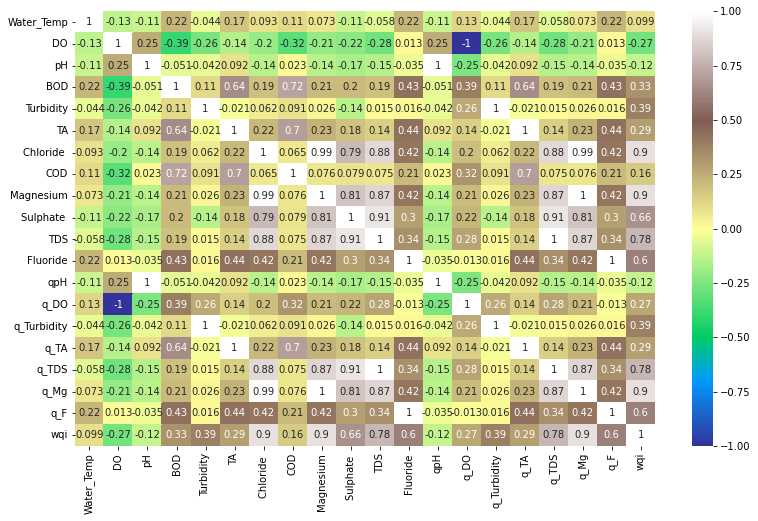

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.drop(["S.no"],axis=1).corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
#models


In [ ]:
X = df2.drop('wqi', axis=1)
y = df2.wqi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
y_test.shape

(24,)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train , y_train)
y_pred = lm.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 3.671137468093851e-14
Mean Squared Error(MSE): 2.271919407036514e-27
Root Mean Squared Error (RMSE): 4.7664655742347644e-14
Explained Variance Score (EVS): 1.0
R2: 1.0


In [ ]:
y_test

32     82.272451
26     67.178986
57     45.749769
22     73.685020
2      76.167973
16     55.381376
42     78.801550
61    159.259116
13     43.738666
66     98.541793
27     44.104347
39     89.560869
21     56.502003
14    119.823499
75     50.084816
6     239.147489
48     87.426806
55     97.007157
30    103.274786
3      87.240939
67     39.814607
25    183.618382
71     50.444388
1      49.501055
Name: wqi, dtype: float64

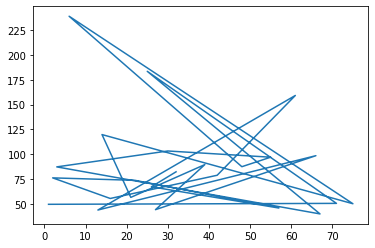

In [ ]:
y_test.plot()

In [ ]:
print('R2 rounded:',(metrics.r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)

R2 rounded: 1.0


In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train , y_train)
yr_pred = model_ridge.predict(x_test)
yr_pred

array([ 82.27187909,  67.17941291,  45.750857  ,  73.68641191,
        76.16828176,  55.38260192,  78.80221045, 159.25924167,
        43.74020891,  98.54192725,  44.10611185,  89.56087049,
        56.50298259, 119.82317151,  50.08565358, 239.14556393,
        87.42693526,  97.00736752, 103.27463993,  87.24204581,
        39.81493674, 183.61703624,  50.44437558,  49.50192506])

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 3.671137468093851e-14
Mean Squared Error(MSE): 2.271919407036514e-27
Root Mean Squared Error (RMSE): 4.7664655742347644e-14
Explained Variance Score (EVS): 1.0
R2: 1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree = DecisionTreeRegressor()
model_DecisionTree.fit(X_train , y_train)
yD_pred = model_DecisionTree.predict(x_test)
yD_pred

array([ 53.17582844,  53.17582844,  40.28068809, 175.42142207,
        50.14228073,  57.65979586,  80.20479001, 116.0533945 ,
        53.17582844, 161.4985531 ,  43.55038071,  89.60329906,
        50.14228073,  89.14041138,  71.96034962, 239.06201677,
        86.61852323, 161.4985531 , 126.95548955, 126.95548955,
        38.02726842,  98.93323852,  38.02726842,  43.55038071])

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 3.671137468093851e-14
Mean Squared Error(MSE): 2.271919407036514e-27
Root Mean Squared Error (RMSE): 4.7664655742347644e-14
Explained Variance Score (EVS): 1.0
R2: 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X_train , y_train)
yRF_pred = model_RandomForest.predict(x_test)
yRF_pred

array([ 75.22797194,  68.76234068,  56.55601743,  98.64329572,
        78.1410749 ,  63.23057437,  77.62979268, 132.80912101,
        56.36419267, 124.07333568,  54.42117699,  84.87612486,
        62.29890777, 118.87374345,  64.18783517, 255.29123909,
        84.92982833, 118.71539636, 110.7339186 , 110.22080604,
        42.61698162, 207.30759545,  50.32403573,  47.72241102])

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 3.671137468093851e-14
Mean Squared Error(MSE): 2.271919407036514e-27
Root Mean Squared Error (RMSE): 4.7664655742347644e-14
Explained Variance Score (EVS): 1.0
R2: 1.0


 linear

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lm)
pickle.dump(lm, open("lm.pkl", "wb"))
# Load the pickled model
imported_model = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
imported_model.predict(x_test)

array([ 82.27245093,  67.1789857 ,  45.74976906,  73.68502041,
        76.16797261,  55.38137609,  78.80154969, 159.25911625,
        43.7386662 ,  98.54179326,  44.10434659,  89.5608694 ,
        56.50200318, 119.82349866,  50.08481569, 239.14748858,
        87.42680611,  97.00715733, 103.27478594,  87.2409387 ,
        39.81460748, 183.61838227,  50.44438837,  49.50105508])